In [18]:
# Proposal Interesting Data Set & Beginner Tutorial 

# PISA  -  The Programme for International Student Assessment

In [3]:
import pandas as pd
import csv
import numpy as np
import os
from functools import reduce
from pandas import DataFrame, Series 
import requests
import matplotlib
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix


In [4]:
#GDP_Per_Capita=pd.read_csv('DATA/GDP-Per-Capita-all.csv',dtype=object,skiprows=[0,2,3],usecols=[1,*range(50,60)])
GDP_Per_Capita=pd.read_csv('DATA/GDP-Per-Capita-all.csv',skiprows=[0,2,3],usecols=[1,59])
GDP_Per_Capita=GDP_Per_Capita.dropna()
GDP_Per_Capita.rename(columns={'Country Code': 'Country_code','2015':'GDP_2015'}, inplace=True)
print(GDP_Per_Capita.head())

with open('1-GDP_Per_Capita.csv', 'w') as f:
    
    GDP_Per_Capita.to_csv(f, header=True,index=0,float_format='%.3f')
f.close()

  Country_code      GDP_2015
1          AFG    569.577923
2          AGO   3695.793748
3          ALB   3934.895394
4          AND  36038.267604
5          ARB   6435.525509


In [5]:
#Population_by_country=pd.read_csv('DATA/Population-by-country-all.csv',dtype=object,skiprows=[0,2,3],usecols=[1,*range(50,60)])
Population_by_country=pd.read_csv('DATA/Population-by-country-all.csv',skiprows=[0,2,3],usecols=[1,59])
Population_by_country=Population_by_country.dropna()
Population_by_country.rename(columns={'Country Code': 'Country_code','2015':'Population_2015'}, inplace=True)
print(Population_by_country.head())

with open('2-Population_by_country.csv', 'w') as f:
    
    Population_by_country.to_csv(f, header=True,index=0)
f.close()

  Country_code  Population_2015
0          ABW         104341.0
1          AFG       33736494.0
2          AGO       27859305.0
3          ALB        2880703.0
4          AND          78014.0


In [6]:
#Life_expectancyy=pd.read_csv('DATA/Life_expectancy-all.csv',dtype=object,skiprows=[0,2,3],usecols=[1,*range(50,60)])
Life_expectancy=pd.read_csv('DATA/Life_expectancy_all.csv',skiprows=[0,2,3],usecols=[1,59])
Life_expectancy=Life_expectancy.dropna()
Life_expectancy.rename(columns={'Country Code': 'Country_code','2015':'Life_E_2015'}, inplace=True)
print(Life_expectancy.head())

with open('3-Life_expectancy.csv', 'w') as f:
    
    Life_expectancy.to_csv(f, header=True,index=0,float_format='%.3f')
f.close()

  Country_code  Life_E_2015
0          ABW    75.594341
1          AFG    63.298195
2          AGO    61.189341
3          ALB    78.203146
5          ARB    71.028439


In [8]:
Math_Performance_2015=pd.read_csv('DATA/MathPerformance/PISA_Math_all.csv',usecols=[0,1,2,5,6])
Math_Performance_2015.rename(columns={'LOCATION': 'Country_code','TIME':'Year','Value':'MATH2015'}, inplace=True)


Math_Performance_2015=Math_Performance_2015[(Math_Performance_2015['Year']==2015) & (Math_Performance_2015['SUBJECT']=='TOT')]

Math_Performance_2015.rename(columns={'Country Code': 'Country_code'}, inplace=True)
print(Math_Performance_2015.head())
with open('4-Math_Performance_2015.csv', 'w') as f:
    
    Math_Performance_2015.to_csv(f, header=True,index=0)
f.close()

    Country_code INDICATOR SUBJECT  Year  MATH2015
372          AUS  PISAMATH     TOT  2015     494.0
376          AUT  PISAMATH     TOT  2015     497.0
381          BEL  PISAMATH     TOT  2015     507.0
386          CAN  PISAMATH     TOT  2015     516.0
391          CZE  PISAMATH     TOT  2015     492.0


In [9]:
Reading_Performance_2015=pd.read_csv('DATA/ReadingPerformance/PISA_Reading_all.csv',usecols=[0,1,2,5,6])
Reading_Performance_2015.rename(columns={'LOCATION': 'Country_code','TIME':'Year','Value':'READ2015'}, inplace=True)
print(Math_Performance_2015.head())

Reading_Performance_2015=Reading_Performance_2015[(Reading_Performance_2015['Year']==2015) & (Reading_Performance_2015['SUBJECT']=='TOT')]

Reading_Performance_2015.rename(columns={'Country Code': 'Country_code'}, inplace=True)

with open('5-Reading_Performance_2015.csv', 'w') as f:
    
    Reading_Performance_2015.to_csv(f, header=True,index=0)
f.close()

    Country_code INDICATOR SUBJECT  Year  MATH2015
372          AUS  PISAMATH     TOT  2015     494.0
376          AUT  PISAMATH     TOT  2015     497.0
381          BEL  PISAMATH     TOT  2015     507.0
386          CAN  PISAMATH     TOT  2015     516.0
391          CZE  PISAMATH     TOT  2015     492.0


In [14]:
Science_Performance_2015=pd.read_csv('DATA/SciencePerformance/PISA_Science_all.csv',usecols=[0,1,2,5,6])
Science_Performance_2015.rename(columns={'LOCATION': 'Country_code','TIME':'Year','Value':'SCIENCE2015'}, inplace=True)


Science_Performance_2015=Science_Performance_2015[(Science_Performance_2015['Year']==2015) & (Science_Performance_2015['SUBJECT']=='TOT')]

Science_Performance_2015.rename(columns={'Country Code': 'Country_code'}, inplace=True)
print(Science_Performance_2015.head())
with open('6-Science_Performance_2015.csv', 'w') as f:
    
    Science_Performance_2015.to_csv(f, header=True,index=0)
f.close()

    Country_code    INDICATOR SUBJECT  Year  SCIENCE2015
305          AUS  PISASCIENCE     TOT  2015        510.0
308          AUT  PISASCIENCE     TOT  2015        495.0
312          BEL  PISASCIENCE     TOT  2015        502.0
316          CAN  PISASCIENCE     TOT  2015        528.0
320          CZE  PISASCIENCE     TOT  2015        493.0


In [16]:
Pisa_df_2015=[Math_Performance_2015,Reading_Performance_2015,Science_Performance_2015,GDP_Per_Capita,Population_by_country,Life_expectancy]
Pisa_df_2015= reduce(lambda  left,right: pd.merge(left,right,on='Country_code', how='left'), Pisa_df_2015)
Pisa_df_2015=Pisa_df_2015.dropna()

with open('7-Pisa_df_2015.csv', 'w') as f:
    Pisa_df_2015.to_csv(f, header=True,index=0,columns=['Country_code','MATH2015','READ2015','SCIENCE2015','GDP_2015','Population_2015','Life_E_2015'])

f.close()

Pisa_df_2015=pd.read_csv('7-Pisa_df_2015.csv')
print(Pisa_df_2015.head())

  Country_code  MATH2015  READ2015  SCIENCE2015      GDP_2015  \
0          AUS     494.0     503.0        510.0  56408.340428   
1          AUT     497.0     485.0        495.0  44255.583356   
2          BEL     507.0     499.0        502.0  40375.388639   
3          CAN     516.0     527.0        528.0  43335.159106   
4          CZE     492.0     487.0        493.0  17715.616852   

   Population_2015  Life_E_2015  
0       23789338.0    82.451220  
1        8633169.0    81.843902  
2       11274196.0    81.287805  
3       35848610.0    82.129024  
4       10546059.0    79.473171  


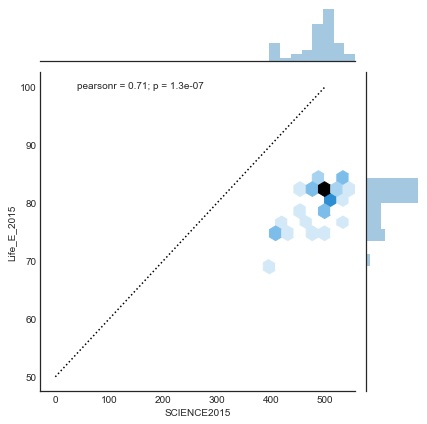

In [17]:
with sns.axes_style('white'):
    g = sns.jointplot("SCIENCE2015", "Life_E_2015", Pisa_df_2015, kind='hex')
    g.ax_joint.plot(np.linspace(0, 500),
                    np.linspace(50, 100), ':k')
    plt.show()

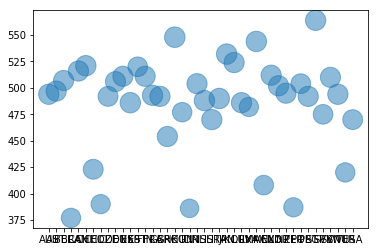

In [18]:
# create data
x = Pisa_df_2015['Country_code']
y = Pisa_df_2015['MATH2015']
z = Pisa_df_2015['Life_E_2015']
 
# use the scatter function
plt.scatter(x, y, s=z*5, alpha=0.5)
plt.show()

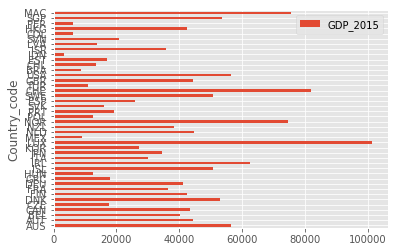

In [19]:
plt.style.use('ggplot')
Pisa_df_2015.plot(kind='barh', y="GDP_2015", x="Country_code")
plt.show()

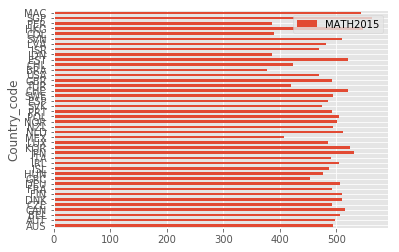

In [21]:
plt.style.use('ggplot')
Pisa_df_2015.plot(kind='barh', y="MATH2015", x="Country_code")
plt.show()

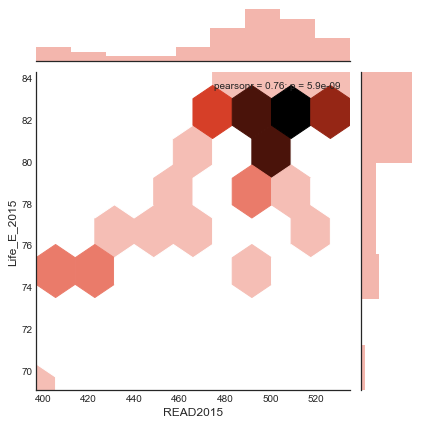

In [22]:
with sns.axes_style('white'):
    sns.jointplot("READ2015", "Life_E_2015", data=Pisa_df_2015, kind='hex')
    plt.show()

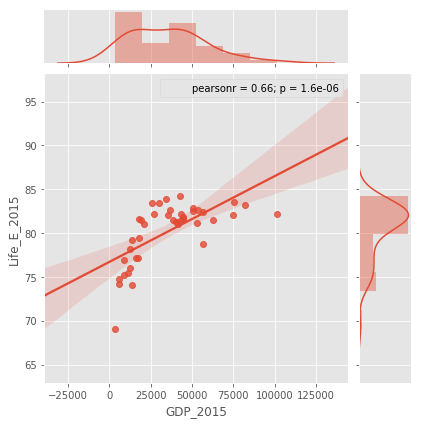

In [23]:
sns.jointplot("GDP_2015", "Life_E_2015", data=Pisa_df_2015, kind='reg');
plt.show()

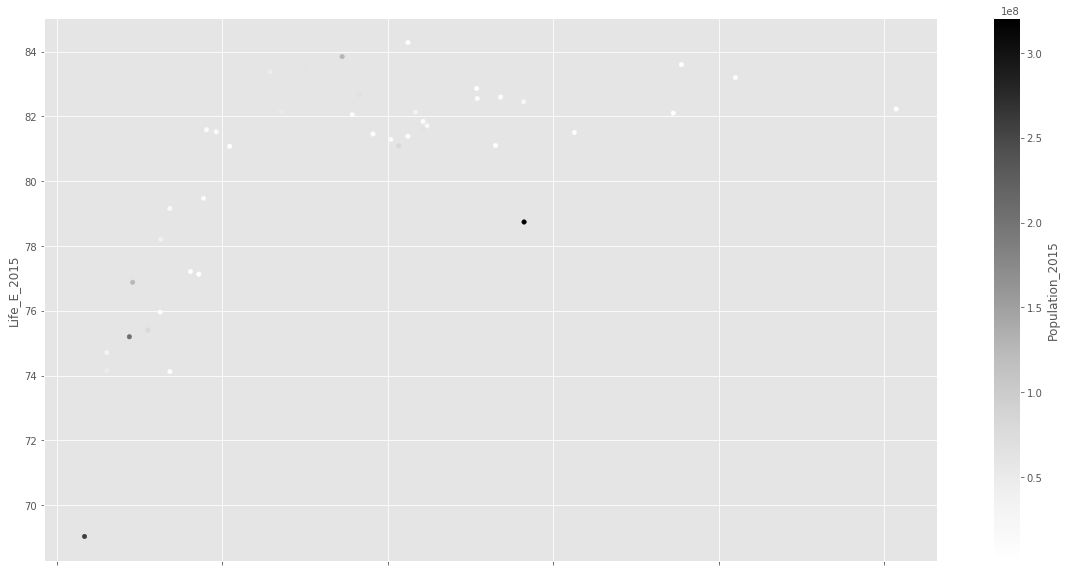

In [24]:
Pisa_df_2015.plot(kind='scatter', x='GDP_2015', y='Life_E_2015', c='Population_2015',figsize=[20,10])
plt.show()

C:\Users\Zeynep\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


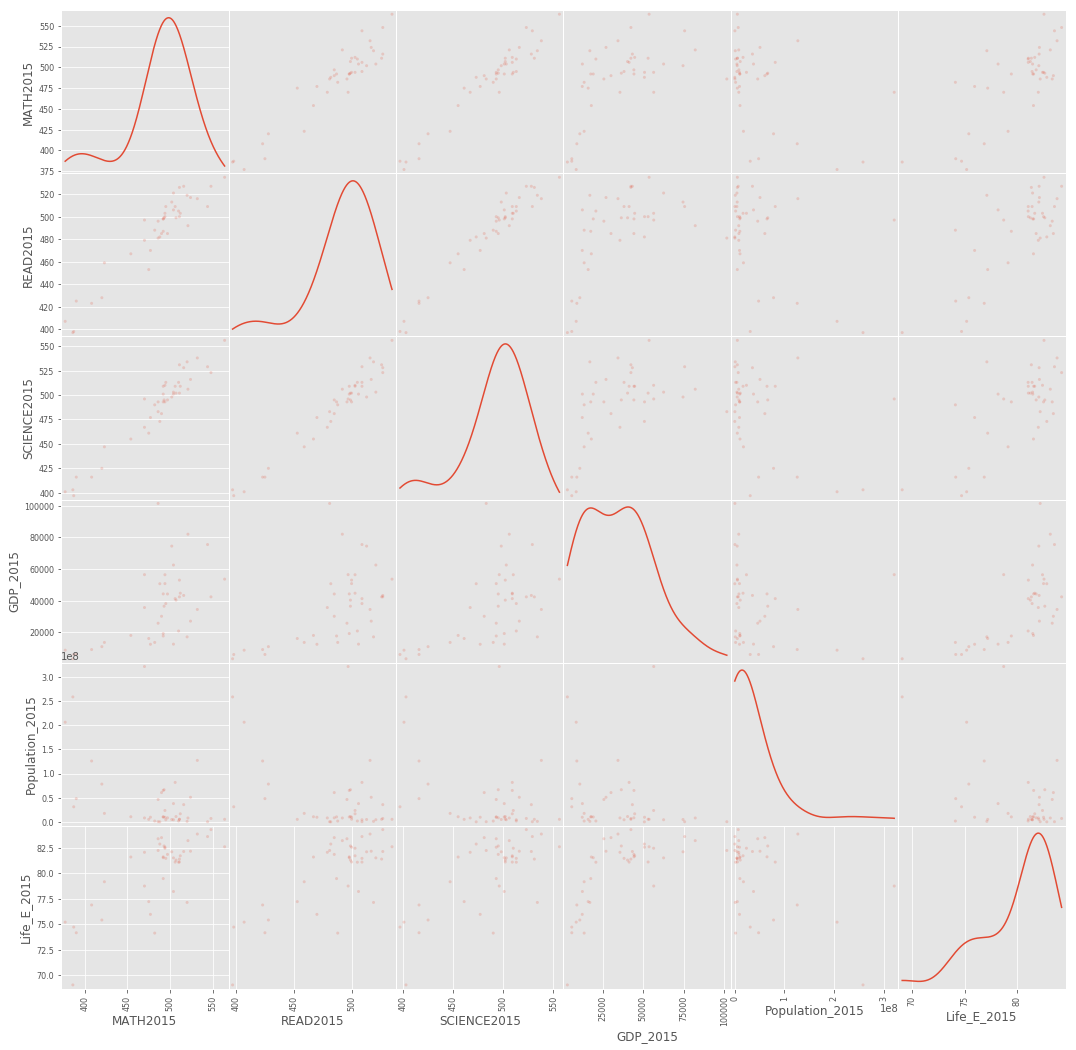

In [25]:
from pandas.tools.plotting import scatter_matrix
areas = Pisa_df_2015[['Country_code','MATH2015','READ2015','SCIENCE2015','GDP_2015','Population_2015','Life_E_2015']]
scatter_matrix(areas, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

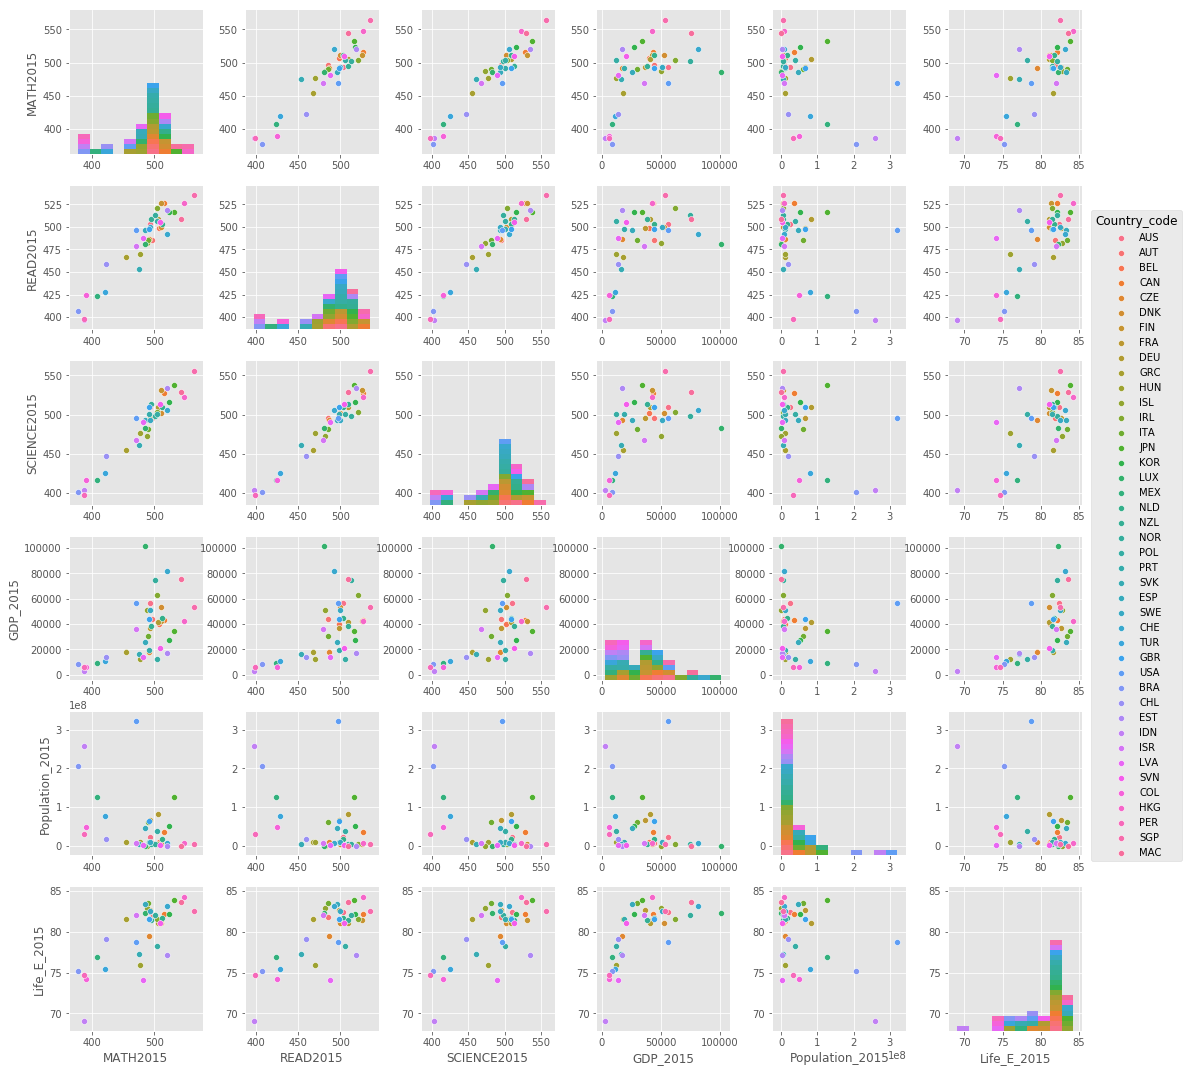

In [27]:
g = sns.pairplot(data=Pisa_df_2015[['Country_code','MATH2015','READ2015','SCIENCE2015','GDP_2015','Population_2015','Life_E_2015']], hue='Country_code', dropna=True)
plt.show()